In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Step 1: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

# Step 2: Data Preprocessing
# Checking for missing values
print(df.isnull().sum())  # No missing values in this dataset

# Features and target separation
X = df.drop('target', axis=1)
y = df['target']

# Step 3: Splitting the dataset into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


Accuracy: 100.00%
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


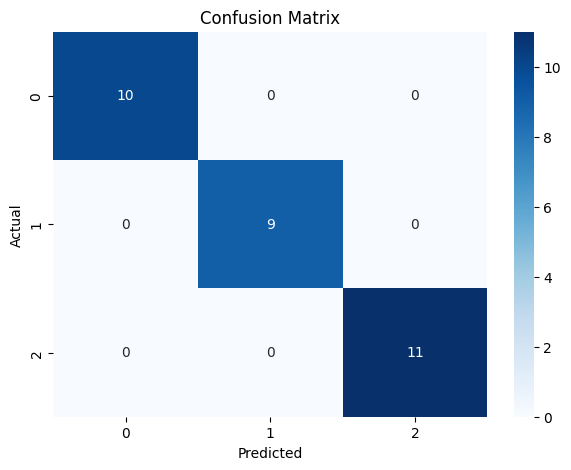

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 4: Model Selection - Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Step 5: Train the model
clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

In [5]:
# Importing Grid Search
from sklearn.model_selection import GridSearchCV

# Step 7: Optional Hyperparameter Tuning using Grid Search
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
              'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Hyperparameters:", grid_search.best_params_)

# Step 8: Re-evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Accuracy of the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {accuracy_best * 100:.2f}%")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4}
Tuned Model Accuracy: 100.00%
